In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

In [2]:
try:
  mnist_train = pd.read_csv('fashion-mnist_train.csv')
  mnist_test = pd.read_csv('fashion-mnist_test.csv')

  trainX = mnist_train.drop('label', axis=1).to_numpy()
  trainY = mnist_train.label.to_numpy()
  testX  = mnist_test.drop('label', axis=1).to_numpy()
  testY  = mnist_test.label.to_numpy()
except:
  from keras.datasets import fashion_mnist
  ((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
  trainX = trainX.reshape(-1, 784)
  testX  = testX.reshape(-1, 784)

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


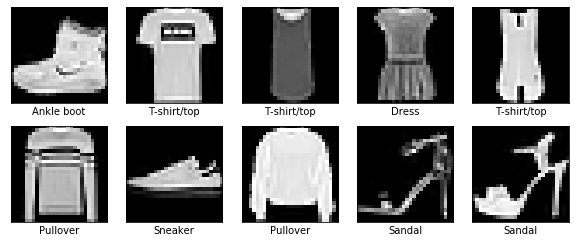

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(trainX[i], (28, 28)), cmap='gray')
    plt.xlabel(class_names[trainY[i]])
plt.show()

## PCA testing

In [0]:
from sklearn.decomposition import PCA

model = PCA()
mnist_reduced = model.fit_transform(trainX)

var_explained = model.explained_variance_ / np.sum(model.explained_variance_)
cum_var_explained = np.cumsum(var_explained)

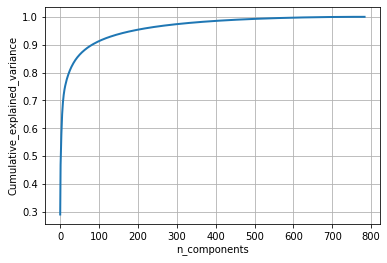

In [6]:
plt.figure(figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [0]:
final_reducer = PCA(n_components=100)
trainX_red = final_reducer.fit_transform(trainX)
testX_red = final_reducer.transform(testX)

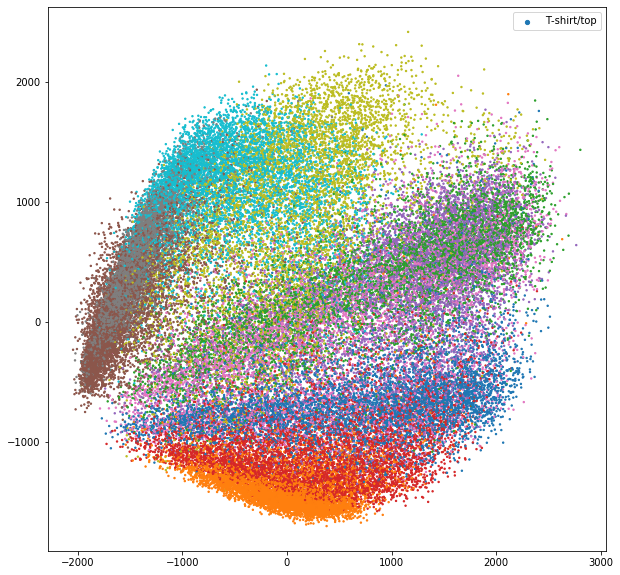

In [8]:
reducer_2d = PCA(n_components=2)
trainX_2d = reducer_2d.fit_transform(trainX)

plt.figure(figsize=(10, 10))
plt.scatter(*zip(*trainX_2d), cmap='tab10', c=trainY, s=2)
plt.legend(tuple(class_names), markerscale=3)

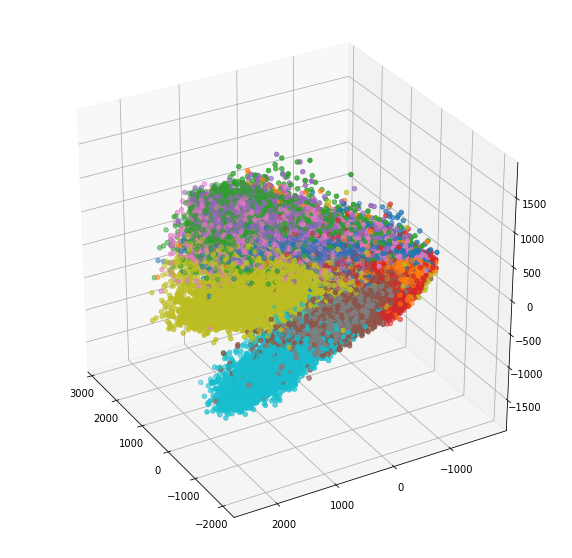

In [31]:
from mpl_toolkits.mplot3d import Axes3D
reducer_3d = PCA(n_components=3)
trainX_3d = reducer_3d.fit_transform(trainX)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*trainX_3d), cmap='tab10', c=trainY)
ax.view_init(30, 150)

## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for k in np.arange(1, 31, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainX_red, trainY)

    acc = model.score(testX_red, testY)
    accuracies.append(acc)

    print('k =', k, 'Accuracy:', acc)

k = 1 Accuracy: 0.8495
k = 3 Accuracy: 0.8588
k = 5 Accuracy: 0.8621
k = 7 Accuracy: 0.8609
k = 9 Accuracy: 0.86
k = 11 Accuracy: 0.8595
k = 13 Accuracy: 0.8592
k = 15 Accuracy: 0.8585
k = 17 Accuracy: 0.8575
k = 19 Accuracy: 0.8559
k = 21 Accuracy: 0.853
k = 23 Accuracy: 0.8526
k = 25 Accuracy: 0.8518
k = 27 Accuracy: 0.851
k = 29 Accuracy: 0.85


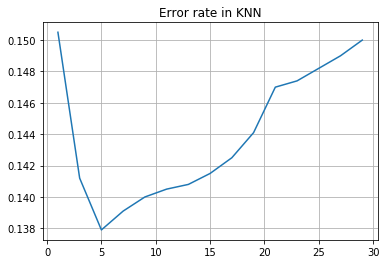

In [0]:
plt.grid()
plt.title('Error rate in KNN')
plt.plot(np.arange(1, 31, 2), 1 - np.array(accuracies))

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=7)
model.fit(trainX_red, trainY)

test_predict = model.predict(testX_red)
confu = confusion_matrix(testY, test_predict)

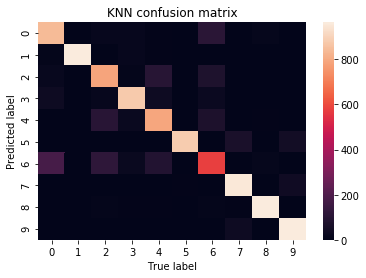

In [0]:
ax = sns.heatmap(confu)
ax.set_title('KNN confusion matrix')
ax.set(xlabel='True label', ylabel='Predicted label')
plt.show()

## For all SVMs - don't run cells without backing up graphs, runtime takes hours

## Linear SVM

In [0]:
from sklearn.svm import SVC

accuracies = []
confusion_matrices = []
for C in np.logspace(-2, 2, num=5):
  model = SVC(kernel='linear', C=C)
  model.fit(trainX_red, trainY)

  acc = model.score(testX_red, testY)
  accuracies.append(acc)
  print('C', C, 'acc', acc)

C 0.01 acc 0.845


## Polynomial SVM

In [0]:
from sklearn.svm import SVC

accuracies = []
confusion_matrices = []
for C in np.logspace(-2, 2, num=5):
  model = SVC(kernel='poly', degree=3, C=C)
  model.fit(trainX_red, trainY)

  acc = model.score(testX_red, testY)
  accuracies.append(acc)
  print('C', C, 'acc', acc)

## Gaussian SVM

In [0]:
from sklearn.svm import SVC

accuracies = []
confusion_matrices = []
for C in np.logspace(-2, 2, num=5):
  model = SVC(kernel='rbf', C=C)
  model.fit(trainX_red, trainY)

  acc = model.score(testX_red, testY)
  accuracies.append(acc)
  print('C', C, 'acc', acc)

## Decision trees + random forests

In [0]:
from sklearn.tree import DecisionTreeClassifier

entropy_accuracies = []
gini_accuracies = []

for depth in np.arange(10, 101, 10):
  entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
  gini_model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
  entropy_model.fit(trainX, trainY)
  gini_model.fit(trainX, trainY)

  entropy_acc = entropy_model.score(testX, testY)
  gini_acc = gini_model.score(testX, testY)

  entropy_accuracies.append(entropy_acc)
  gini_accuracies.append(gini_acc)

  print(depth, entropy_acc, gini_acc)

10 0.8102 0.8008
20 0.8036 0.799
30 0.7971 0.7915
40 0.7985 0.7894
50 0.7998 0.7874
60 0.8011 0.7919
70 0.8019 0.7927
80 0.7998 0.787
90 0.7976 0.788
100 0.8013 0.788


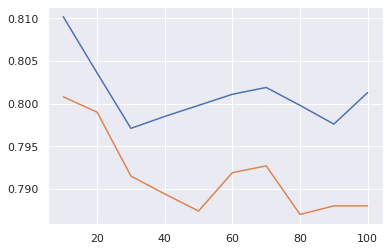

In [0]:
sns.set()
plt.plot(np.arange(10, 101, 10), entropy_accuracies)
plt.plot(np.arange(10, 101, 10), gini_accuracies)
plt.show()

In [0]:
entropy_test_predict = entropy_model.predict(testX)
gini_test_predict = gini_model.predict(testX)
confu_entropy = confusion_matrix(testY, entropy_test_predict)
confu_gini = confusion_matrix(testY, gini_test_predict)

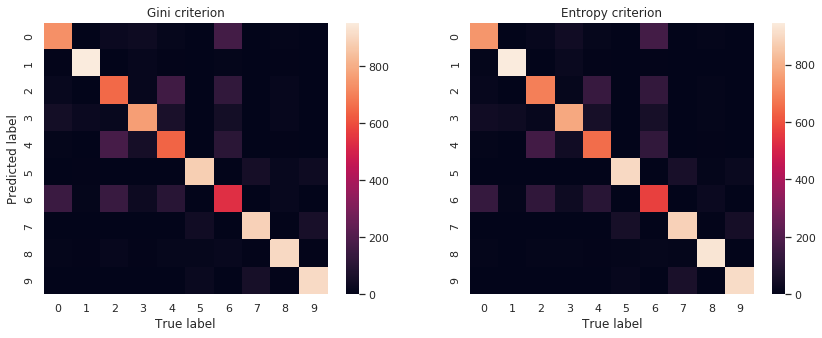

In [0]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
ax = sns.heatmap(confu_gini)
ax.title.set_text('Gini criterion')
ax.set(xlabel='True label', ylabel='Predicted label')
plt.subplot(1, 2, 2)
ax = sns.heatmap(confu_entropy)
ax.title.set_text('Entropy criterion')
ax.set(xlabel='True label')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier

entropy_accuracies = []
gini_accuracies = []

for depth in np.arange(5, 51, 5):
  entropy_model = RandomForestClassifier(criterion='entropy', max_depth=depth, n_estimators=20)
  gini_model =  RandomForestClassifier(criterion='gini', max_depth=depth, n_estimators=20)
  entropy_model.fit(trainX, trainY)
  gini_model.fit(trainX, trainY)

  entropy_acc = entropy_model.score(testX, testY)
  gini_acc = gini_model.score(testX, testY)

  entropy_accuracies.append(entropy_acc)
  gini_accuracies.append(gini_acc)

  print(depth, entropy_acc, gini_acc)

5 0.7743 0.7603
10 0.8456 0.8399
15 0.8643 0.8618
20 0.872 0.8675
25 0.866 0.8692
30 0.8645 0.8662
35 0.8681 0.8675
40 0.8681 0.8664
45 0.8708 0.8693
50 0.8699 0.8678


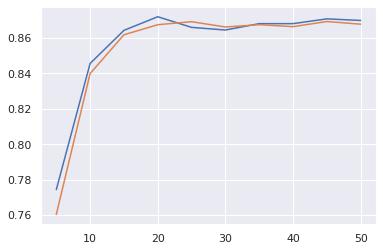

In [0]:
sns.set()
plt.plot(np.arange(5, 51, 5), entropy_accuracies)
plt.plot(np.arange(5, 51, 5), gini_accuracies)
plt.show()

## Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

accuracies = []
for alpha in np.logspace(-10, 2, num=13):
  model = MultinomialNB(alpha=alpha)
  model.fit(trainX, trainY)

  acc = model.score(testX, testY)

  print('alpha', alpha, 'acc', acc)
  accuracies.append(acc)

alpha 1e-10 acc 0.6554
alpha 1e-09 acc 0.6554
alpha 1e-08 acc 0.6554
alpha 1e-07 acc 0.6554
alpha 1e-06 acc 0.6554
alpha 1e-05 acc 0.6554
alpha 0.0001 acc 0.6554
alpha 0.001 acc 0.6554
alpha 0.01 acc 0.6554
alpha 0.1 acc 0.6554
alpha 1.0 acc 0.6554
alpha 10.0 acc 0.6554
alpha 100.0 acc 0.6555


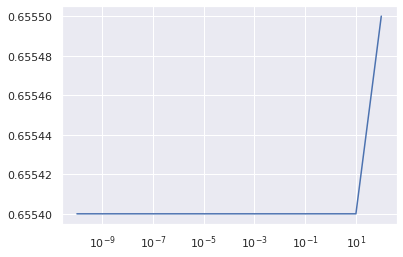

In [0]:
import seaborn as sns
sns.set()
plt.xscale('log')
plt.plot(np.logspace(-10, 2, num=13), accuracies)
plt.show()

In [0]:
from sklearn.naive_bayes import GaussianNB

accuracies = []
for alpha in np.logspace(-15, 1, num=17):
  model = GaussianNB(var_smoothing=alpha)
  model.fit(trainX, trainY)

  acc = model.score(testX, testY)

  print('alpha', alpha, 'acc', acc)
  accuracies.append(acc)

alpha 1e-15 acc 0.5553
alpha 1e-14 acc 0.5609
alpha 1e-13 acc 0.5652
alpha 1e-12 acc 0.5695
alpha 1e-11 acc 0.5734
alpha 1e-10 acc 0.579
alpha 1e-09 acc 0.5856
alpha 1e-08 acc 0.5939
alpha 1e-07 acc 0.6035
alpha 1e-06 acc 0.6192
alpha 1e-05 acc 0.6305
alpha 0.0001 acc 0.642
alpha 0.001 acc 0.658
alpha 0.01 acc 0.6715
alpha 0.1 acc 0.6721
alpha 1.0 acc 0.6476
alpha 10.0 acc 0.6213


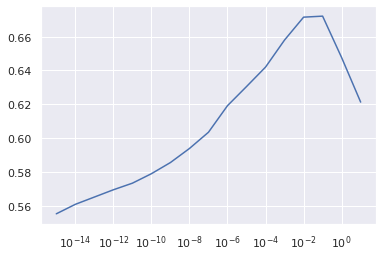

In [0]:
sns.set()
plt.xscale('log')
plt.plot(np.logspace(-15, 1, num=17), accuracies)
plt.show()

## Examples of similar classes

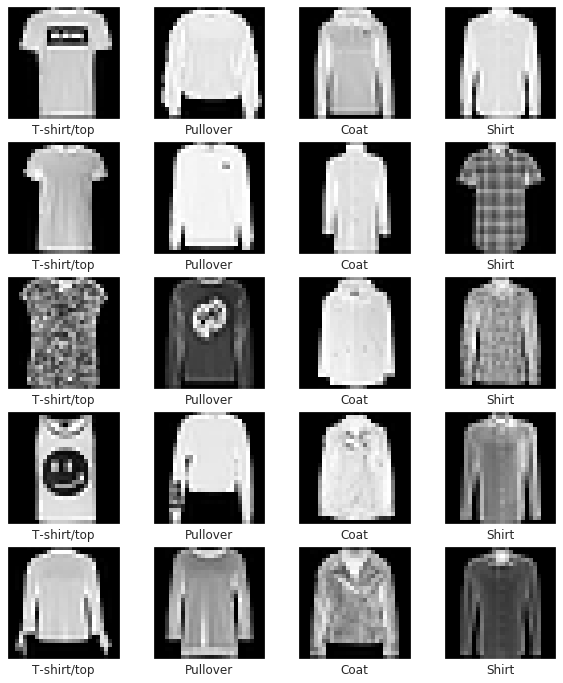

In [0]:
# Similar classes: 0, 2, 4, 6

plt.figure(figsize=(10,12))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(trainX[trainY == 2*(i%4)][i], (28, 28)), cmap='gray')
    plt.xlabel(class_names[2*(i%4)])

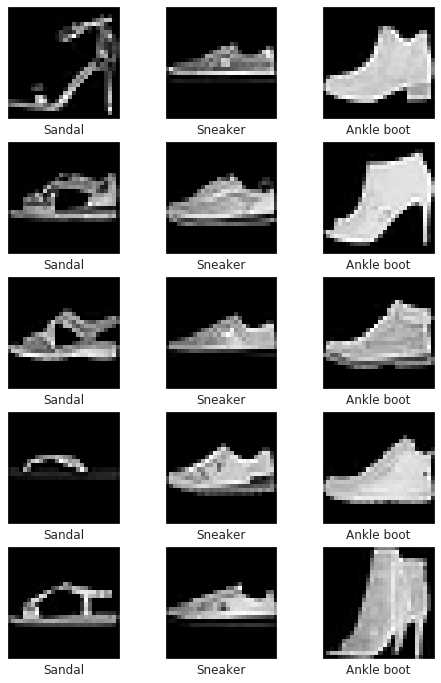

In [0]:
# Another group: 5, 7, 9

plt.figure(figsize=(8,12))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(trainX[trainY == 5 + 2*(i%3)][i], (28, 28)), cmap='gray')
    plt.xlabel(class_names[5 + 2*(i%3)])

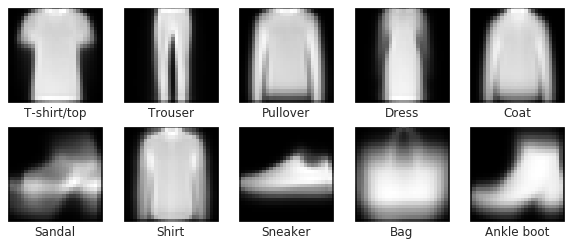

In [0]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(np.mean(trainX[trainY == i], axis=0), (28, 28)), cmap='gray')
    plt.xlabel(class_names[i])
plt.show()

## Basic CNN

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))          


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)    

In [0]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [0]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [24]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [25]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.44914162158966064, Accuracy: 87%
Iteration: 1000, Loss: 0.29551276564598083, Accuracy: 88%
Iteration: 1500, Loss: 0.254255473613739, Accuracy: 86%
Iteration: 2000, Loss: 0.20434677600860596, Accuracy: 89%
Iteration: 2500, Loss: 0.12209847569465637, Accuracy: 89%
Iteration: 3000, Loss: 0.17102840542793274, Accuracy: 89%


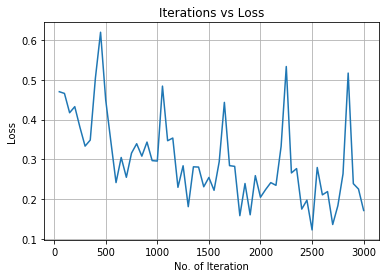

In [28]:
plt.plot(iteration_list, loss_list)
plt.grid()
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

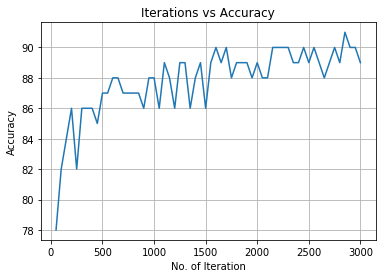

In [30]:
plt.plot(iteration_list, accuracy_list)
plt.grid()
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()